In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
train_dir = os.path.dirname('../input/intel-image-classification/seg_train/seg_train/')
test_dir = os.path.dirname('../input/intel-image-classification/seg_test/seg_test/')
pred_dir = os.path.dirname('../input/intel-image-classification/seg_pred/seg_pred')

In [3]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size = 32,
    seed = 123,
    image_size = (160, 160)
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    batch_size = 32,
    seed = 123,
    image_size = (160, 160)
)

pred_ds = keras.preprocessing.image_dataset_from_directory(
    pred_dir,
    batch_size = 32,
    seed = 123,
    image_size = (160, 160)
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Found 7301 files belonging to 1 classes.


In [4]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


# Image Visualization

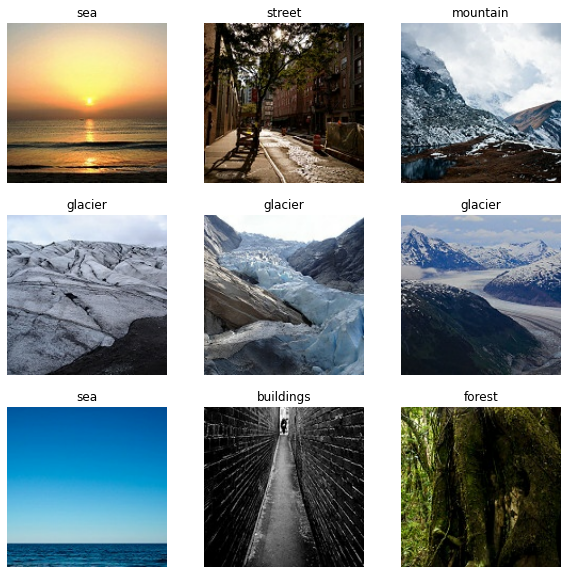

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Model

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras.optimizers as Optimizer

model = models.Sequential()
model.add(layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(160,160,3)))
model.add(layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(5,5))
model.add(layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(5,5))
model.add(layers.Flatten())
model.add(layers.Dense(180,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 156, 156, 180)     324180    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 154, 154, 180)     291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 152, 152, 140)     226940    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 140)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 50)        4

In [7]:
Classifier = model.fit(train_ds, validation_data = test_ds, epochs = 20)

Epoch 1/20
439/439 [==============================] - 249s 568ms/step - loss: 1.3905 - accuracy: 0.4448 - val_loss: 0.9278 - val_accuracy: 0.6583
Epoch 2/20
439/439 [==============================] - 178s 406ms/step - loss: 1.0466 - accuracy: 0.6064 - val_loss: 0.8141 - val_accuracy: 0.6987
Epoch 3/20
439/439 [==============================] - 178s 405ms/step - loss: 0.9084 - accuracy: 0.6717 - val_loss: 0.7986 - val_accuracy: 0.6980
Epoch 4/20
439/439 [==============================] - 178s 404ms/step - loss: 0.8060 - accuracy: 0.7170 - val_loss: 0.6115 - val_accuracy: 0.7880
Epoch 5/20
439/439 [==============================] - 177s 404ms/step - loss: 0.7216 - accuracy: 0.7448 - val_loss: 0.5702 - val_accuracy: 0.8063
Epoch 6/20
439/439 [==============================] - 178s 406ms/step - loss: 0.6433 - accuracy: 0.7751 - val_loss: 0.5315 - val_accuracy: 0.8150
Epoch 7/20
439/439 [==============================] - 178s 406ms/step - loss: 0.5884 - accuracy: 0.7971 - val_loss: 0.5249 -

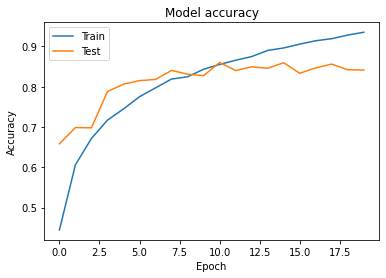

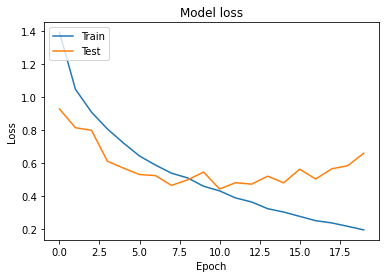

In [8]:
plt.plot(Classifier.history['accuracy'])
plt.plot(Classifier.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(Classifier.history['loss'])
plt.plot(Classifier.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()